In [1]:
# Import de librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga de datos
data = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
# Analisis de missing values 
print("\nMissing values:")
missing_values = data.isnull().sum()


Missing values:


In [5]:
missing_percentage = (missing_values / len(data)) * 100

In [6]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

In [7]:
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

In [8]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [9]:
# ya que los porcentajes de MV son muy bajos para cada variable, busco la moda de cada variable para reemplazarlo
teacher_quality_mode = data['Teacher_Quality'].mode()[0]
parental_education_mode = data['Parental_Education_Level'].mode()[0]
distance_from_home_mode = data['Distance_from_Home'].mode()[0]

print("Teacher Quality - Moda: ", teacher_quality_mode)
print("Parental Education Level - Moda: ", parental_education_mode)
print("Distance from Home - Moda: ", distance_from_home_mode)

Teacher Quality - Moda:  Medium
Parental Education Level - Moda:  High School
Distance from Home - Moda:  Near


In [10]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [11]:
print(missing_summary)

                          Missing Values  Percentage
Teacher_Quality                       78    1.180566
Parental_Education_Level              90    1.362192
Distance_from_Home                    67    1.014076


In [12]:
# reemplazo missing values por el valor de la moda para cada caso
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(teacher_quality_mode)
data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(parental_education_mode)
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(distance_from_home_mode)

# verifico si quedan missing values luego de imputarlos
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [13]:
# Selección de variables
variables = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Exam_Score', 'Sleep_Hours']
data = data[variables]

In [14]:
# Normalización
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

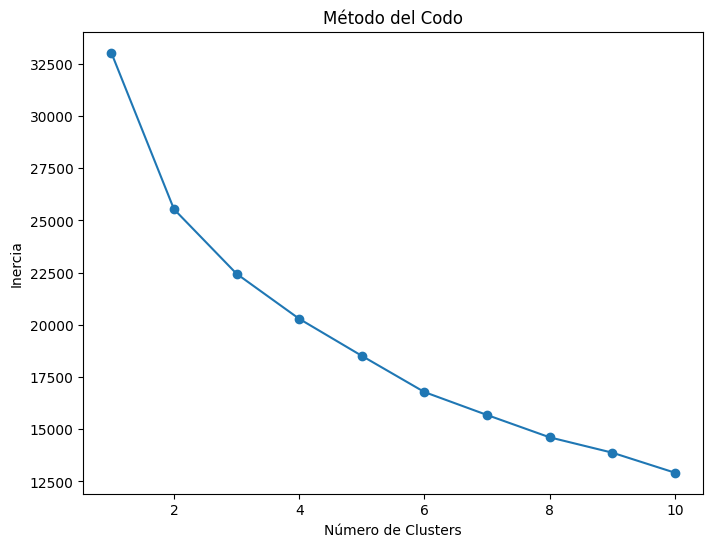

In [15]:
# Método del Codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()

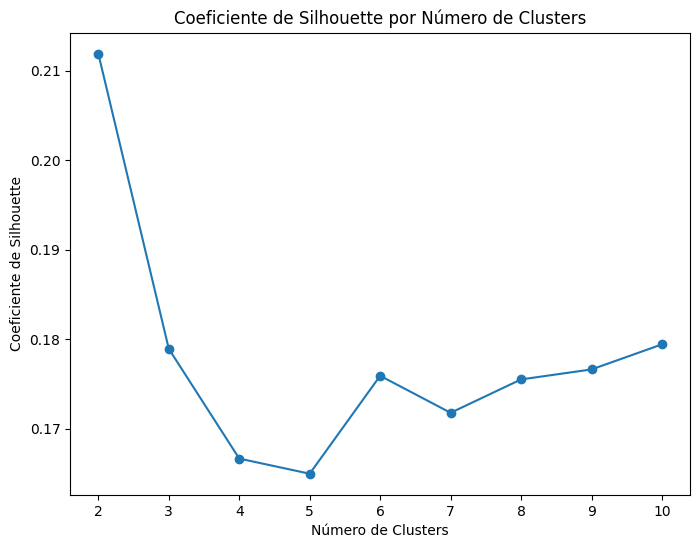

In [16]:
# Coeficiente de Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Gráfico del coeficiente de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Coeficiente de Silhouette por Número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silhouette")
plt.show()

         Attendance  Hours_Studied  Previous_Scores  Exam_Score  Sleep_Hours
Cluster                                                                     
0         74.750347      18.029643        62.050023   64.590551     7.069013
1         72.368927      19.123988        87.912955   65.838057     6.995445
2         90.624595      22.355178        76.176780   70.663026     7.021036


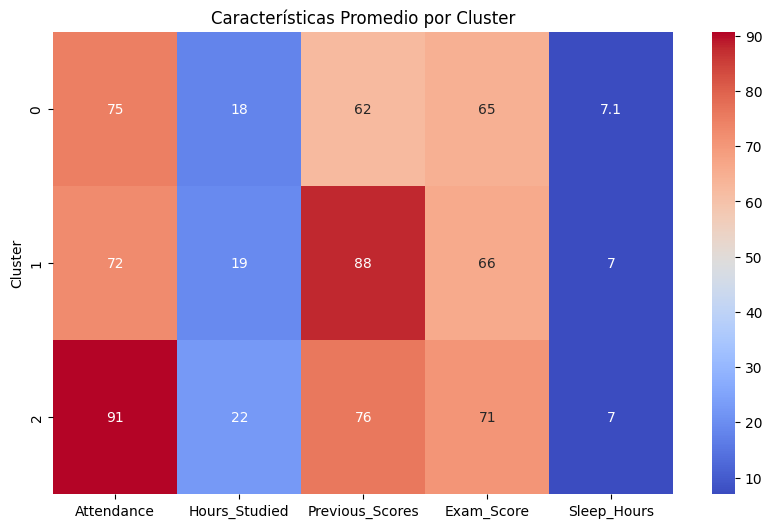

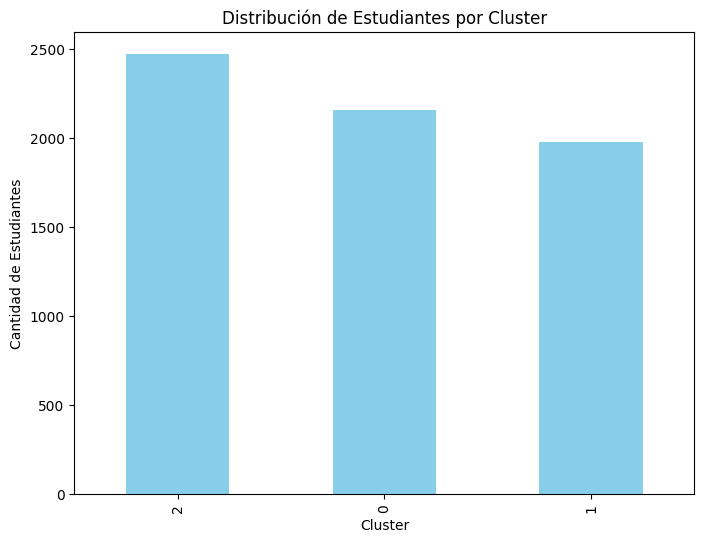

In [20]:
# Número óptimo de clusters (sustituir X por el valor determinado)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Análisis por cluster
cluster_summary = data.groupby('Cluster')[variables].mean()
print(cluster_summary)

# Visualización de clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Características Promedio por Cluster")
plt.show()

# Distribución de estudiantes por cluster
data['Cluster'].value_counts().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title("Distribución de Estudiantes por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Estudiantes")
plt.show()
